<ipython-input-29-e9936cff89e9>:10: RuntimeWarning: divide by zero encountered in true_divide
  return (a*b)/d
<ipython-input-29-e9936cff89e9>:10: RuntimeWarning: divide by zero encountered in true_divide
  return (a*b)/d


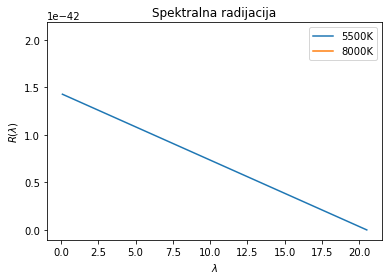

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants

def SpektralnaRadijacija(lamb, T):
    lamb = lamb/(10**(-9))
    a = (2*np.pi*constants.c)/(lamb**4)
    b = (constants.Planck*constants.c)/lamb
    d = (e**(b/(constants.k*T)))-1
    return (a*b)/d

x = np.linspace(0.1, 1000)

fig, ax = plt.subplots()
ax.plot(x, SpektralnaRadijacija(x, 5500))
ax.plot(x, SpektralnaRadijacija(x, 8000))
plt.title( 'Spektralna radijacija' )
plt.xlabel('$\lambda$')
plt.ylabel('$R(\lambda)$')
plt.legend(['5500K','8000K'])
plt.show()

In [1]:
%%latex
\begin{aligned}
B_{\lambda}(\lambda, T) = \frac{2hc^2}{\lambda^5} \frac{1}{e^{\frac{hc}{\lambda k_B T}} - 1}
\end{aligned}

<IPython.core.display.Latex object>

In [3]:
import numpy as np


def planck(wavelength, temp):
    """ Return the emitted radiation from a blackbody of a given temp and wavelength
    
    Args:
        wavelength (float): wavelength (m)
        temp (float): temperature of black body (Kelvin)
        
    Returns:
        float: spectral radiance (W / (sr m^3))
        
    """
    k_b = 1.3806488e-23  # J/K  Boltzmann constant
    h = 6.626070040e-34  # J s - Planck's constant
    c = 3e8  # m/s - speed of light
    
    return ((2 * h * c ** 2) / wavelength ** 5 * 
            1 / (np.exp(h * c / (wavelength * k_b * temp)) - 1))

In [4]:
for temp in (3000, 4000, 5000):
    rad = planck(0.5e-6, temp)
    rad_kW_per_sr_m2_nm = rad / 1e3 / 1e9  # convert from W to kW and m to nm
    print('%.3f K: %.5f kW/(sr m^2 nm)' % (temp, rad_kW_per_sr_m2_nm))

3000.000 K: 0.25890 kW/(sr m^2 nm)
4000.000 K: 2.85480 kW/(sr m^2 nm)
5000.000 K: 12.07559 kW/(sr m^2 nm)


In [6]:
# Import and alias to "plt"
import matplotlib.pyplot as plt

In [11]:
# Calculate
wavelength = np.linspace(1e-7, 3e-6, 1000)
temp = np.array([8000, 5500])

rad = np.zeros((wavelength.size, temp.size), dtype=np.float)

for i, t in enumerate(temp):
    rad[:, i] = planck(wavelength, t)

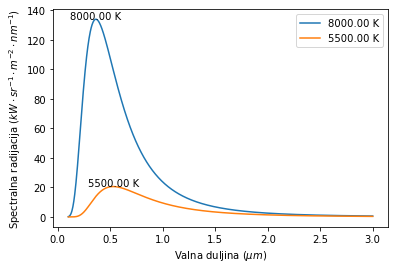

In [14]:
# %% matplotlib nbagg

# Plot
text_x = wavelength[rad.argmax(axis=0)] * 1e6
text_y = rad.max(axis=0) / 1e3 / 1e9
temp_str = ['%.2f K' % t for t in temp]

fig, ax = plt.subplots()
ax.plot(wavelength * 1e6, rad / 1e3 / 1e9)
for _x, _y, _temp in zip(text_x, text_y, temp_str):
    ax.text(_x, _y, _temp, ha='center')

plt.legend(labels=['%.2f K' % t for t in temp])

plt.xlabel(r'Valna duljina ($\mu m$)')
plt.ylabel(r'Spectralna radijacija ($kW \cdot sr^{-1} \cdot m^{-2} \cdot nm^{-1}$)')
plt.savefig('Spektralna radijacija.png')